# CREDIT EDA CASE STUDY

<i>Introduction:- This case study aims to give  an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.</i>

<i>Problem statement:- This case study aims to identify patterns which indicate if a client has difficulty paying theirinstallments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.</i>

In [1]:
#filtering out the warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#setting the max no. of display of rows and columns
pd.set_option('display.max_columns', 300) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.width', 1000)

## 1)APPLICATION DATA

### 1.1)Data Cleaning and Manipulation

In [4]:
#loading the csv file
app_data=pd.read_csv("application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#checking the shape of data
app_data.shape

(307511, 122)

In [6]:
#checking the data types of columns
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
#checking the summary of numeric columns
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
#checking the percentage of null values
100*(app_data.isnull().sum())/len(app_data)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
#dropping the columns with null value percentage more than 45%
app_data=app_data.loc[:,app_data.isnull().mean()<=0.45]


In [10]:
#checking the shape again
app_data.shape

(307511, 73)

In [11]:
#checking the columns with null values less than or equal to 13%
app_data.columns[(app_data.isnull().mean()<=0.13) & (app_data.isnull().mean()>0)]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'], dtype='object')

#### 1.1.1)Finding the outliers and imputation of values

In [12]:
plt.style.available# checking different available styles in matplotlib

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

##### AMT_ANNUITY

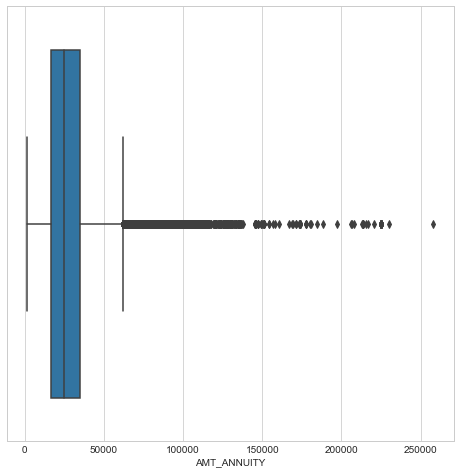

In [13]:
#checking the outliers of column"AMT_ANNUITY"
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[8,8])
sns.boxplot(app_data["AMT_ANNUITY"])
plt.show()

In [14]:
#filling the missing values with median (because the column has outliers)
app_data["AMT_ANNUITY"]=app_data["AMT_ANNUITY"].fillna(app_data["AMT_ANNUITY"].median())
app_data["AMT_ANNUITY"].isnull().sum() #checking if it still has null values

0

##### CNT_FAM_MEMBERS

In [15]:
app_data.CNT_FAM_MEMBERS.value_counts(normalize=True)*100

2.0     51.496704
1.0     22.063419
3.0     17.105516
4.0      8.031310
5.0      1.131024
6.0      0.132679
7.0      0.026341
8.0      0.006504
9.0      0.001951
10.0     0.000976
14.0     0.000650
16.0     0.000650
12.0     0.000650
20.0     0.000650
11.0     0.000325
13.0     0.000325
15.0     0.000325
Name: CNT_FAM_MEMBERS, dtype: float64

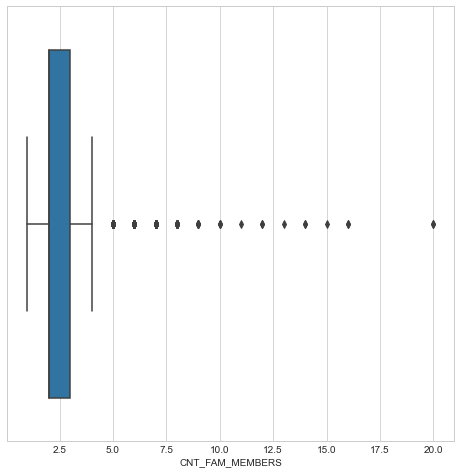

In [16]:
#checking outliers for column "CNT_FAM_MEMBERS"
plt.figure(figsize=[8,8])
sns.boxplot(app_data["CNT_FAM_MEMBERS"])
plt.show()

In [17]:
#filling the missing values with median(because it has ouliers)
app_data["CNT_FAM_MEMBERS"]=app_data["CNT_FAM_MEMBERS"].fillna(app_data["CNT_FAM_MEMBERS"].median())
app_data["CNT_FAM_MEMBERS"].isnull().sum()

0

##### AMT_GOODS_PRICE

In [18]:
app_data.AMT_GOODS_PRICE.value_counts(normalize=True)*100

450000.0    8.469793
225000.0    8.228934
675000.0    8.124778
900000.0    5.017690
270000.0    3.719653
              ...   
705892.5    0.000325
442062.0    0.000325
353641.5    0.000325
353749.5    0.000325
738945.0    0.000325
Name: AMT_GOODS_PRICE, Length: 1002, dtype: float64

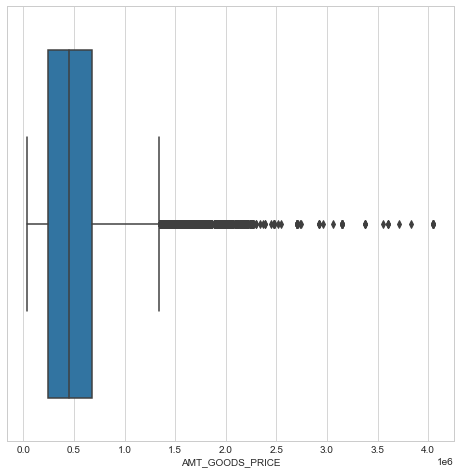

In [19]:
#checking for outliers using boxplot
plt.figure(figsize=[8,8])
sns.boxplot(app_data["AMT_GOODS_PRICE"])
plt.show()

In [20]:
#filling the missing values with median(because it has outliers)
app_data["AMT_GOODS_PRICE"]=app_data["AMT_GOODS_PRICE"].fillna(app_data["AMT_GOODS_PRICE"].median())


In [21]:
app_data["AMT_GOODS_PRICE"].isnull().sum()

0

##### EXT_SOURCE_2

In [22]:
app_data["EXT_SOURCE_2"].value_counts(normalize=True)*100

0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.350188    0.000326
0.146502    0.000326
0.068121    0.000326
0.316079    0.000326
0.463396    0.000326
Name: EXT_SOURCE_2, Length: 119828, dtype: float64

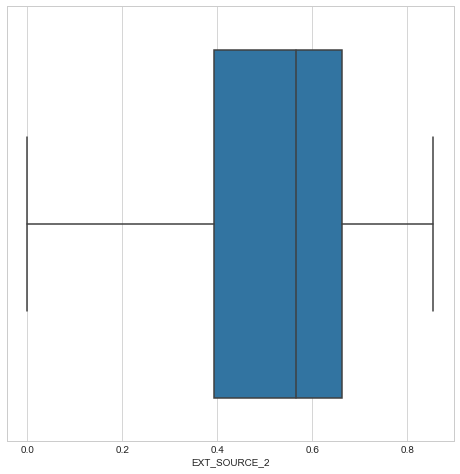

In [23]:
#checking for outliers using boxplot
plt.figure(figsize=[8,8])
sns.boxplot(app_data["EXT_SOURCE_2"])
plt.show()

In [24]:
#since this column has no outliers,we will fill the missing values with mean
app_data["EXT_SOURCE_2"]=app_data["EXT_SOURCE_2"].fillna(app_data["EXT_SOURCE_2"].mean())
app_data.EXT_SOURCE_2.isnull().sum()

0

#### 1.1.2)Checking data types of columns

In [25]:
#checking for number of columns of datatype 'int'
int_col=app_data.select_dtypes(include=["int64"]).columns
int_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], dtype='object')

In [26]:
#checking for number of columns of datatype 'float'
float_col=app_data.select_dtypes(include=["float64"]).columns
float_col

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [27]:
#checking for number of columns of datatype 'object'
obj_col=app_data.select_dtypes(include=["object"]).columns
obj_col

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], dtype='object')

In [28]:
#converting columns to their appropriate data types
float_to_int = ['CNT_FAM_MEMBERS','DAYS_REGISTRATION', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

app_data.loc[:,float_to_int]=app_data.loc[:,float_to_int].apply(lambda x: x.astype('int',errors='ignore'))

In [29]:
#converting columns to their appropriate data types
app_data.loc[:,obj_col]=app_data.loc[:,obj_col].apply(lambda y: y.astype('str',errors='ignore'))


In [30]:
#checking value counts for gender column
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<i>We can observe that gender columns has junk values named 'XNA' . So we will drop those rows.</i>

In [31]:
app_data=app_data[app_data['CODE_GENDER']!='XNA']

#### 1.1.3)Binning of values

##### AMT_INCOME_TOTAL

In [32]:
app_data['AMT_INCOME_TOTAL'].quantile([0,0.2,0.4,0.6,0.8,1])

0.0        25650.0
0.2        99000.0
0.4       135000.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [33]:
#creating binned variable 'INCOME_RANGE'
app_data["INCOME_RANGE"]=pd.qcut(app_data['AMT_INCOME_TOTAL'],q=[0,0.2,0.4,0.6,0.8,1],labels=['VeryLow','Low','Average','High','VeryHigh'])

In [34]:
app_data.INCOME_RANGE.value_counts()

Low         85755
High        75512
VeryLow     63671
VeryHigh    47117
Average     35452
Name: INCOME_RANGE, dtype: int64

##### DAYS_BIRTH

<i>We will derive a new column "age" from 'days birth' column by dividing the column from 365.25.</i>

In [35]:
app_data['AGE'] =app_data['DAYS_BIRTH']//365.25

In [36]:
app_data['AGE'].value_counts()

-39    8913
-38    8788
-40    8757
-37    8642
-41    8641
-28    8564
-42    8465
-32    8433
-44    8306
-43    8195
-29    7985
-33    7882
-45    7781
-31    7778
-36    7772
-34    7719
-30    7672
-35    7664
-55    7616
-54    7447
-46    7263
-47    7260
-48    7027
-49    6966
-57    6868
-53    6786
-52    6741
-58    6733
-60    6700
-50    6677
-56    6552
-51    6407
-59    6258
-61    6162
-63    5525
-62    5390
-64    5189
-65    5144
-27    4554
-26    4176
-24    4083
-25    3911
-66    3001
-23    2962
-68    2081
-67    2036
-22    1276
-69     757
-21       1
-70       1
Name: AGE, dtype: int64

<i>We saw that the age column has negative values,so we will convert all negative values to positive using 'abs()' function.</i>

In [37]:
app_data["AGE"]=abs(app_data["AGE"])

In [38]:
app_data.AGE.value_counts()

39    8913
38    8788
40    8757
37    8642
41    8641
28    8564
42    8465
32    8433
44    8306
43    8195
29    7985
33    7882
45    7781
31    7778
36    7772
34    7719
30    7672
35    7664
55    7616
54    7447
46    7263
47    7260
48    7027
49    6966
57    6868
53    6786
52    6741
58    6733
60    6700
50    6677
56    6552
51    6407
59    6258
61    6162
63    5525
62    5390
64    5189
65    5144
27    4554
26    4176
24    4083
25    3911
66    3001
23    2962
68    2081
67    2036
22    1276
69     757
70       1
21       1
Name: AGE, dtype: int64

<i>Now that we have age column , we will create a new column named "AGE_GROUP".</i>

In [39]:
app_data.AGE.min()

21

In [40]:
#Creating binned variable "AGE_GROUP"
app_data['AGE_GROUP']= pd.cut(app_data.AGE,bins=np.linspace(20 ,70,num=11))
app_data.AGE_GROUP.value_counts()

(35.0, 40.0]    42872
(40.0, 45.0]    41388
(30.0, 35.0]    39476
(45.0, 50.0]    35193
(50.0, 55.0]    34997
(55.0, 60.0]    33111
(25.0, 30.0]    32951
(60.0, 65.0]    27410
(20.0, 25.0]    12233
(65.0, 70.0]     7876
Name: AGE_GROUP, dtype: int64

#### 1.1.4)Checking imbalance

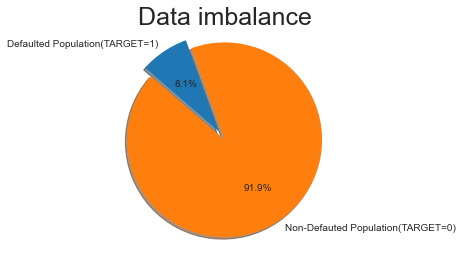

In [41]:
# checking imbalance in the target variable
c1 = 0 
c0 = 0
for i in app_data['TARGET'].values:
    if i == 1:
        c1 += 1
    else:
        c0 += 1
        
c1 = (c1/len(app_data['TARGET']))*100
c0 = (c0/len(app_data['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [c1, c0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

In [42]:
#splitting the dataframe w.r.t target variable
app_data_t0 =app_data[app_data.TARGET==0]
app_data_t1=app_data[app_data.TARGET==1]

In [43]:
app_data_t0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE,AGE_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,46,"(45.0, 50.0]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryLow,53,"(50.0, 55.0]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,53,"(50.0, 55.0]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,55,"(50.0, 55.0]"
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970,-477,1,1,1,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,VeryLow,47,"(45.0, 50.0]"


## 1.2)Univariate analysis

#### 1.2.1)Analysis of categorical variables

In [44]:
#function to plot categorical variables
def uniplotfunc(var):
    plt.figure(figsize=(10,8))
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=app_data_t0)
    plt.title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=12)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=app_data_t1)
    plt.title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=12)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

##### Univariate Categorical unordered analysis

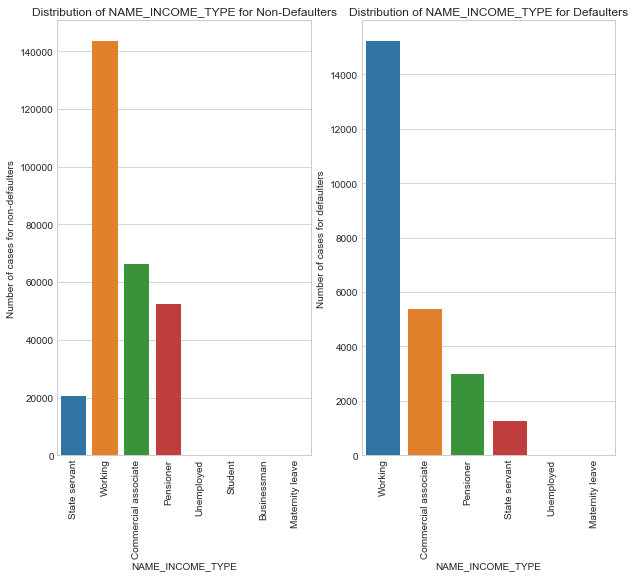

In [45]:
#plotting 'NAME_INCOME_TYPE'column
uniplotfunc('NAME_INCOME_TYPE')

<i>From above graph,we observe that people who own business pays the loan amount on time. We also see that students and people who are on maternity leave are less likely to default.This is because they don't need to pay the amount for certain period of time</i>  

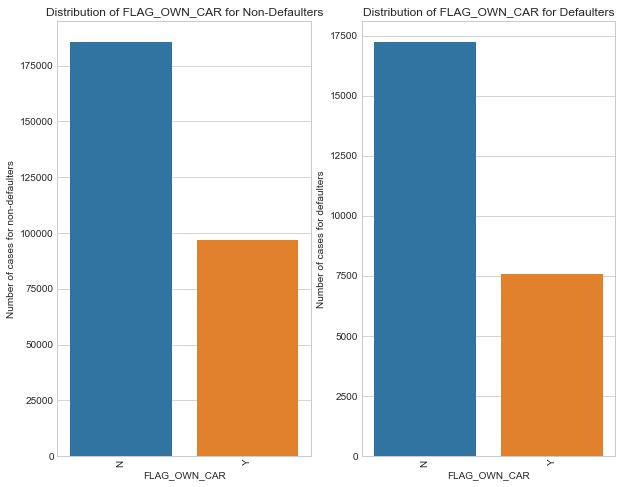

In [46]:
uniplotfunc("FLAG_OWN_CAR")

<i> From the above graph, we can observe that people who don't own a car are more likely to default than those who do.</i>

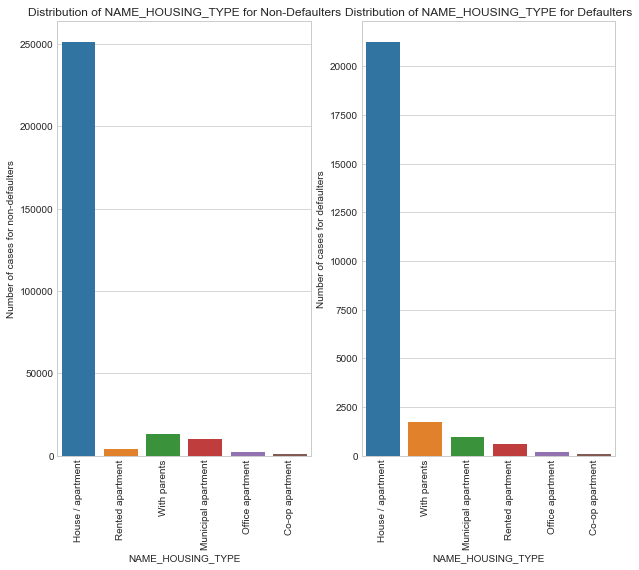

In [47]:
uniplotfunc("NAME_HOUSING_TYPE")

<i>From the above graph we observe that people who own a house are more likely to default than people who live with parents and people with rented apartment</i>

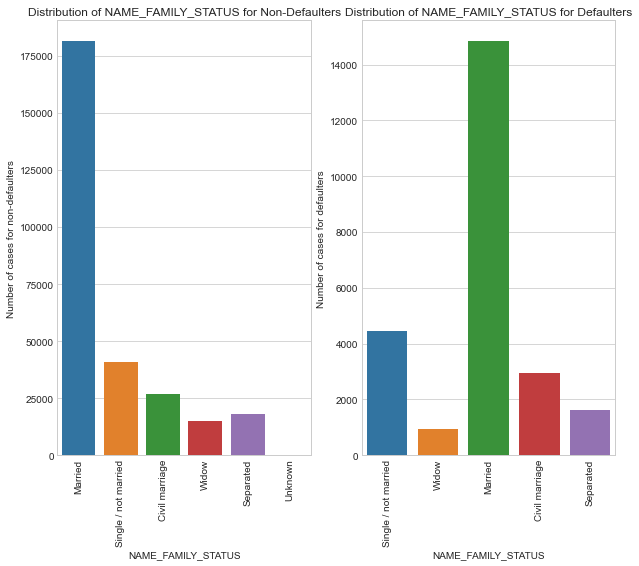

In [48]:
uniplotfunc('NAME_FAMILY_STATUS')

<i>From the above graph we can observe that there is not much difference between married people who default and those who dont default.But we can see that there is high risk invovled in providing loans to single/married people.</i> 

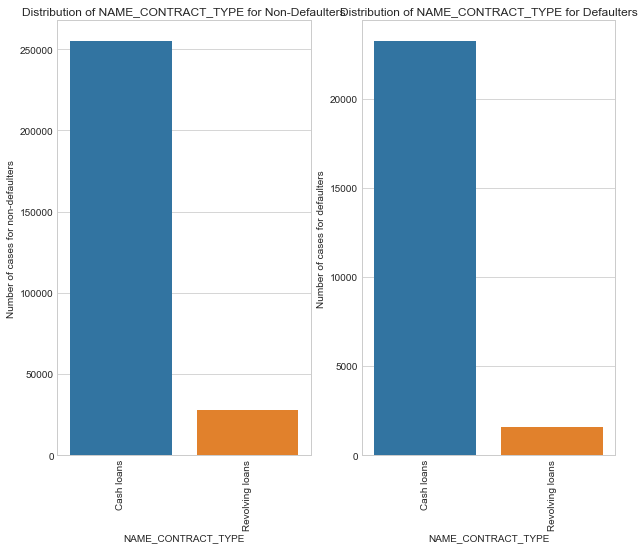

In [49]:
uniplotfunc('NAME_CONTRACT_TYPE')

<i>From the above graph,we can see that there is high risk in providing cash loans compared to revolving loans.</i>

##### Univariate categorical ordered analysis

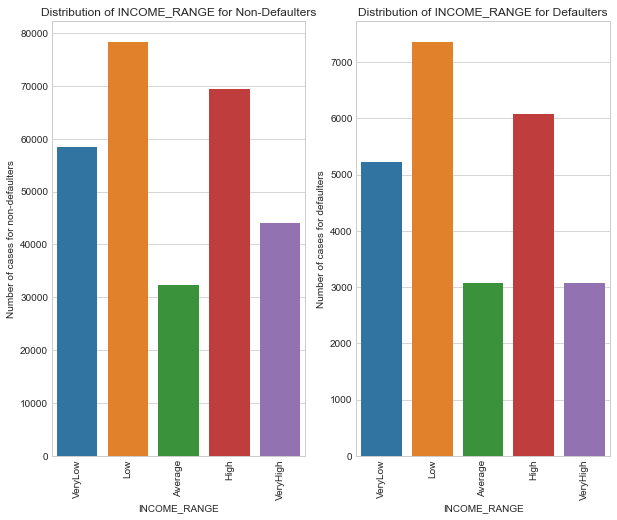

In [50]:
uniplotfunc("INCOME_RANGE")

<i>From the graph,we see that people with low income are more likely to default compared to people with high and very high income.We also see an interesting observation where people with very low income default less compared to people with low income whereas it's assumed vice versa.</i>

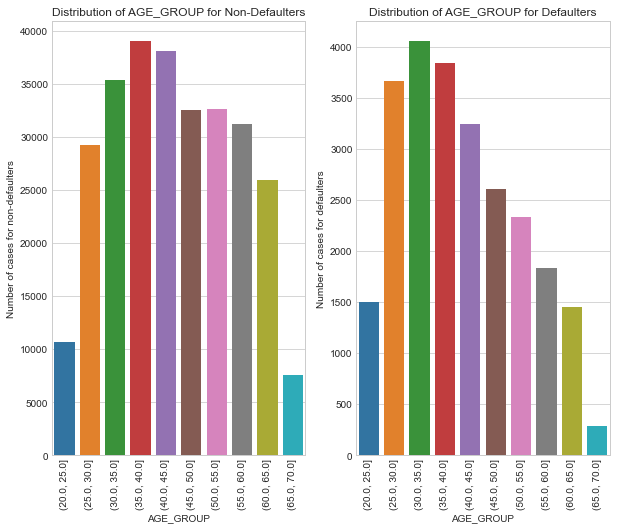

In [51]:
uniplotfunc("AGE_GROUP")

<i>From the above graph, we observe that most people who apply for loans are in age group between 30-40 yrs.</i> 

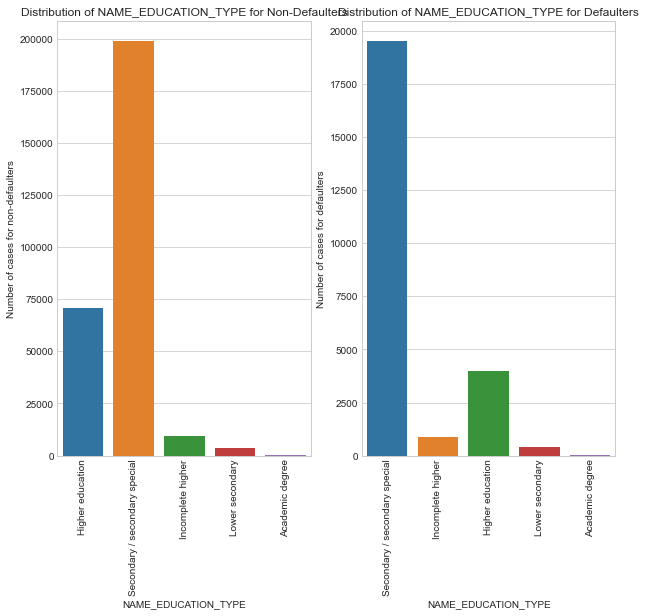

In [52]:
uniplotfunc("NAME_EDUCATION_TYPE")

<i>Almost all of the Education categories are equally likely to default except for the higher educated ones who are less likely to default and secondary educated people are more likely to default.</i>

#### 1.2.2)Univariate Analysis for numerical variables

In [53]:
#distribution plot for univariate analysis
def plotunidist(var):

    plt.style.use('seaborn-whitegrid')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,12))
    
    sns.distplot(a=app_data_t0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=13)
            
    sns.distplot(a=app_data_t1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=13)    
        
    plt.show()

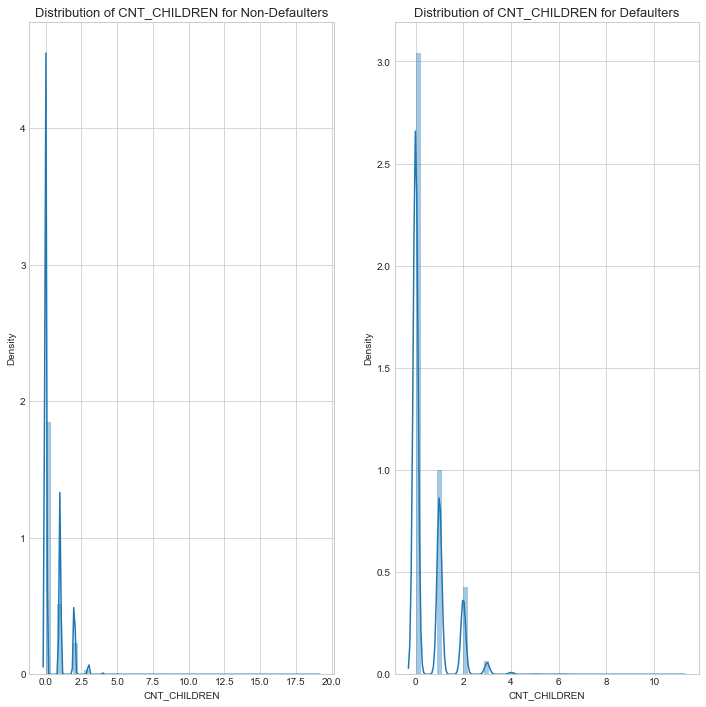

In [54]:
plotunidist("CNT_CHILDREN")

<i>From the above graph we observe that people with 2 or more children are less likely to default.</i>

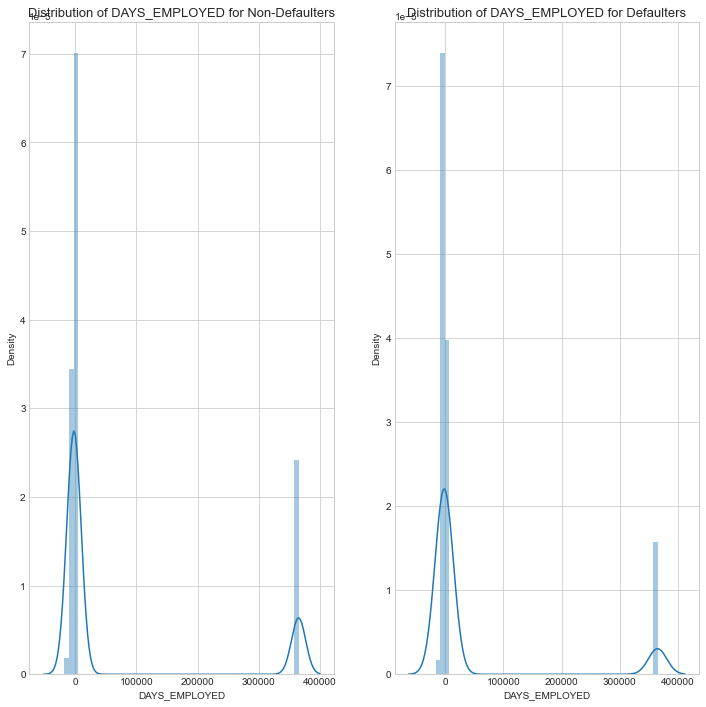

In [55]:
plotunidist("DAYS_EMPLOYED")

<i>Here,we see that people who have been employed for a long time are less likely to default.</i>

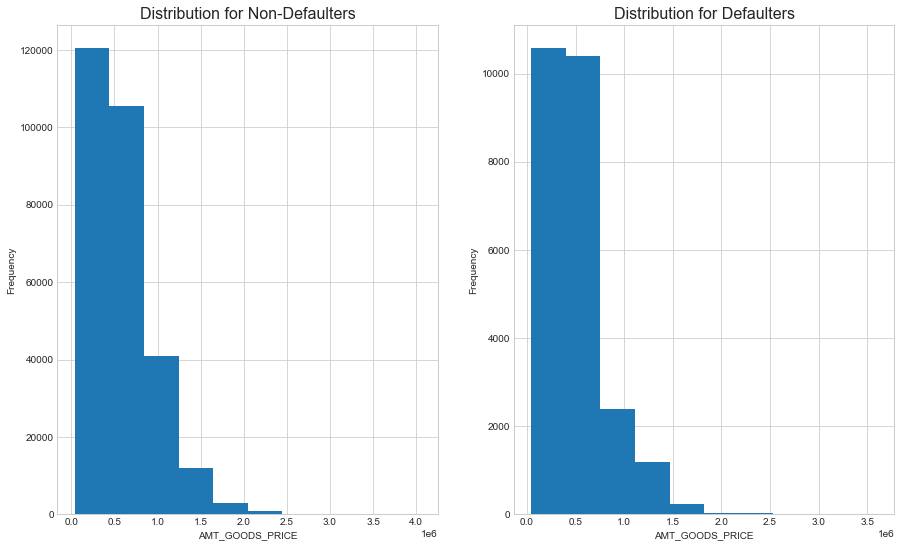

In [56]:
plt.figure(figsize=(15,9))
plt.subplot(1, 2, 1)
app_data_t0["AMT_GOODS_PRICE"].plot.hist()
plt.title('Distribution for Non-Defaulters', fontsize=16)
plt.xlabel("AMT_GOODS_PRICE")
plt.subplot(1, 2, 2)
app_data_t1["AMT_GOODS_PRICE"].plot.hist()
plt.title('Distribution for Defaulters', fontsize=16)
plt.xlabel("AMT_GOODS_PRICE")
plt.show()

<i>From the above graph, we see that defaults are higher for price of the goods for which the loan is given is lesser (between 0 to 500,000).</i>

### 1.3)Getting top 10 correlations of numerical variables

In [57]:
#checking correlation of 'app_data_t0' dataframe
col_num=list(app_data_t0.select_dtypes('int64').columns)
col_float=list(app_data_t0.select_dtypes('float').columns)

col=col_num+col_float

Nondef_num=app_data_t0[col]
Nondef_corr = Nondef_num.corr()
round(Nondef_corr, 3)
l1=Nondef_corr.unstack()
l1.sort_values(ascending=False).drop_duplicates()

AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998508
AMT_GOODS_PRICE              AMT_CREDIT                     0.987024
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950148
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
                                                              ...   
DAYS_BIRTH                   DAYS_EMPLOYED                 -0.618051
FLAG_EMP_PHONE               AGE                           -0.622021
DAYS_BIRTH                   AGE                           -0.999711
FLAG_EMP_PHONE               DAYS_EMPLOYED                 -0.999758
SK_ID_CURR                   TARGET                              NaN
Length: 1698, dtype: float64

In [58]:
#checking correlation of 'app_data_t1' dataframe
col_num=list(app_data_t1.select_dtypes('int64').columns)
col_float=list(app_data_t1.select_dtypes('float').columns)

col=col_num+col_float

def_num=app_data_t1[col]
def_corr = def_num.corr()
round(def_corr, 3)
l1=def_corr.unstack()
l1.sort_values(ascending=False).drop_duplicates()

AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998269
AMT_CREDIT                   AMT_GOODS_PRICE               0.982783
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.956637
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.868994
                                                             ...   
FLAG_EMP_PHONE               AGE                          -0.578641
FLAG_DOCUMENT_6              FLAG_EMP_PHONE               -0.617421
DAYS_BIRTH                   AGE                          -0.999691
FLAG_EMP_PHONE               DAYS_EMPLOYED                -0.999702
SK_ID_CURR                   TARGET                             NaN
Length: 1473, dtype: float64

### 1.4)Bivariate Analysis

#### 1.4.1)Bivariate Analysis of numerical variables

In [59]:
def biplotfunc(var1,var2):

    plt.style.use('seaborn-whitegrid')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,12))
    
    sns.scatterplot(x=var1, y=var2,data=app_data_t0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=13)
    
    sns.scatterplot(x=var1, y=var2,data=app_data_t1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=13)
            
    plt.show()

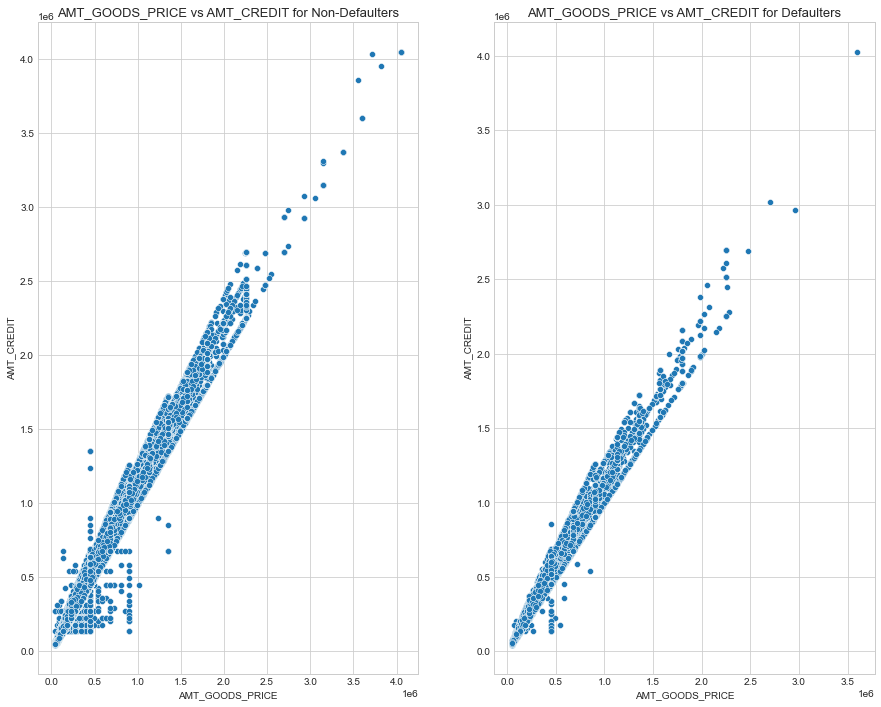

In [60]:
biplotfunc('AMT_GOODS_PRICE','AMT_CREDIT')

<i>From the above graph, we see that defaulters are less if price of good is upto 500k and amount credit is also less than 500k.</i>

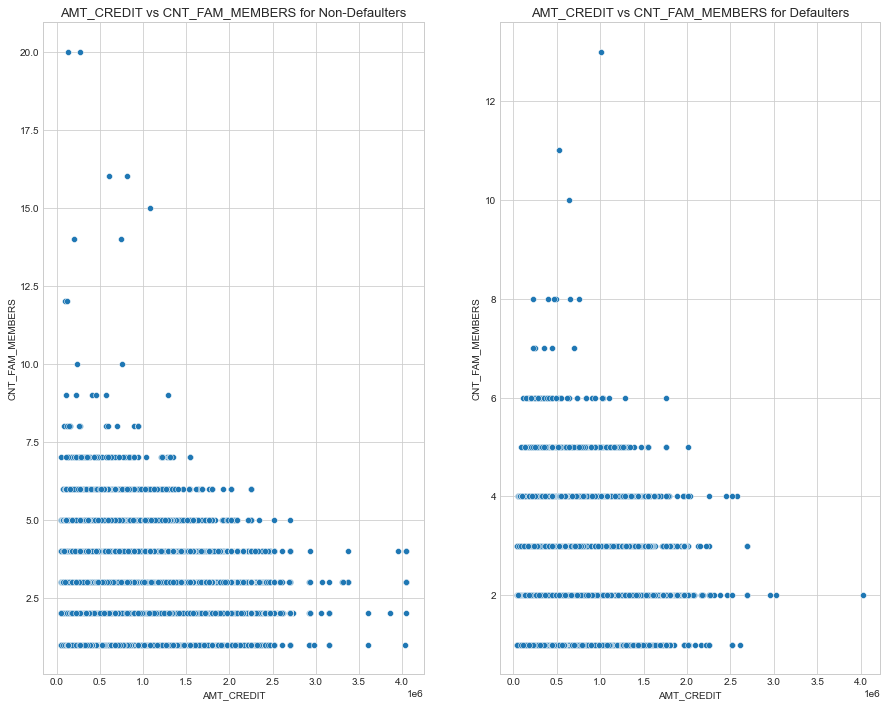

In [61]:
biplotfunc('AMT_CREDIT','CNT_FAM_MEMBERS')

<i>From the above graph,we can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often.</i>

## 2)PREVIOUS_APPLICATION

In [62]:
#loading the previous application csv file
previous = pd.read_csv("previous_application.csv")
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1)Data Cleaning and Manipulation

In [63]:
# checking the shape
previous.shape

(1670214, 37)

In [64]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [65]:
# checking the summary for numerical columns
previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [66]:
# checking the null values
previous.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [67]:
#checking the null values in percentage
(previous.isnull().sum()/len(previous))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [68]:
# checking the shape again 
previous.shape

(1670214, 37)

In [69]:
# dropping the columns which have null values above 40% and storing the new data frame p1
p1 = previous.drop(['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','NAME_TYPE_SUITE','RATE_INTEREST_PRIMARY',
'RATE_INTEREST_PRIVILEGED','RATE_DOWN_PAYMENT','AMT_DOWN_PAYMENT','CNT_PAYMENT'],axis = 1)

In [70]:
# checking the null values
(p1.isnull().sum()/len(previous))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINAT

In [71]:
p1.shape

(1670214, 25)

In [72]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 25 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### 2.2)Univariate Analysis

#### 2.2.1)Univariate analysis of categorical variables

In [73]:
#function to plot the graph
def plot_univariant_graph(variable):

    
    fig,ax = plt.subplots(1,1,figsize=(15,6))
    
    sns.countplot(x=variable, data=p1,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {variable}',fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    
    plt.show()

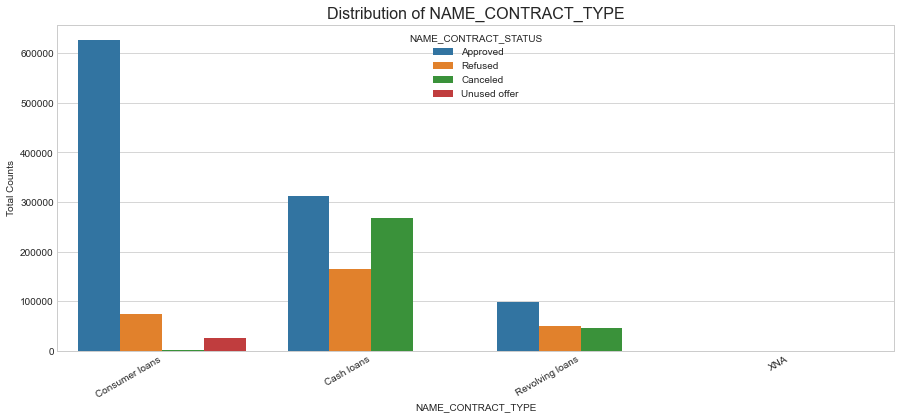

In [74]:
plot_univariant_graph('NAME_CONTRACT_TYPE')

<i>as we can see above that most of the applications are for 'Cash loan' and 'Consumer loan' even they are canceled.</i>

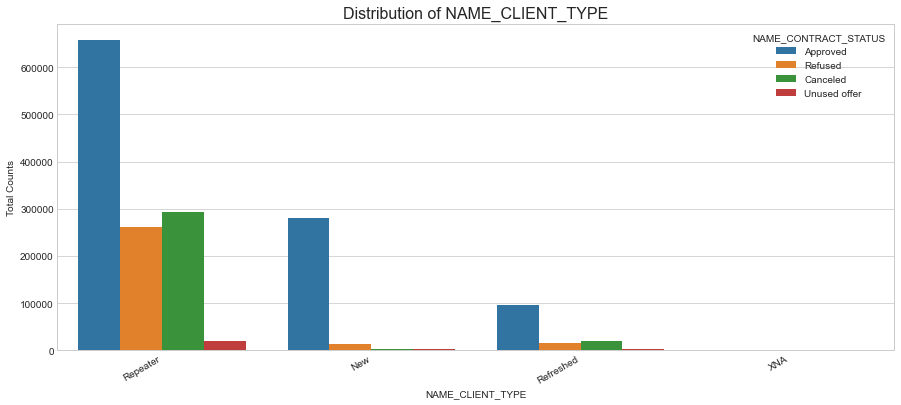

In [75]:
plot_univariant_graph('NAME_CLIENT_TYPE')

<i>as we can see that most of the approved loans are for the repeaters category</i>

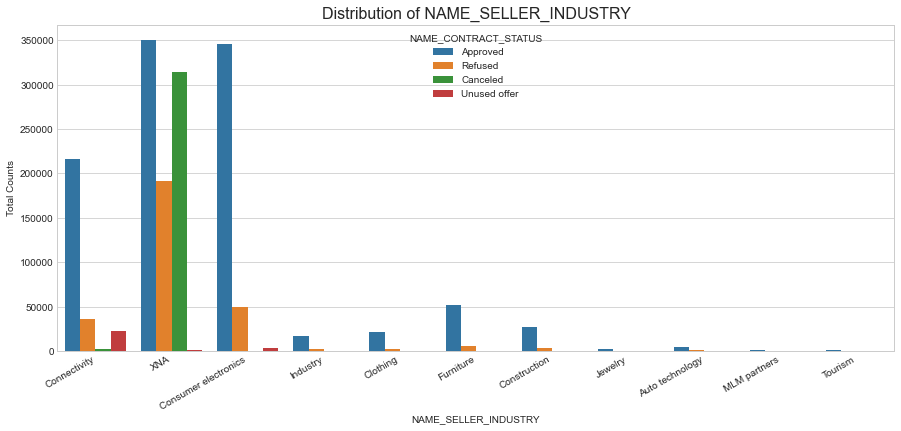

In [76]:
plot_univariant_graph('NAME_SELLER_INDUSTRY')

In [77]:
# removing the rows where the values are XNA
p1 = p1[~(p1.NAME_SELLER_INDUSTRY == 'XNA')]

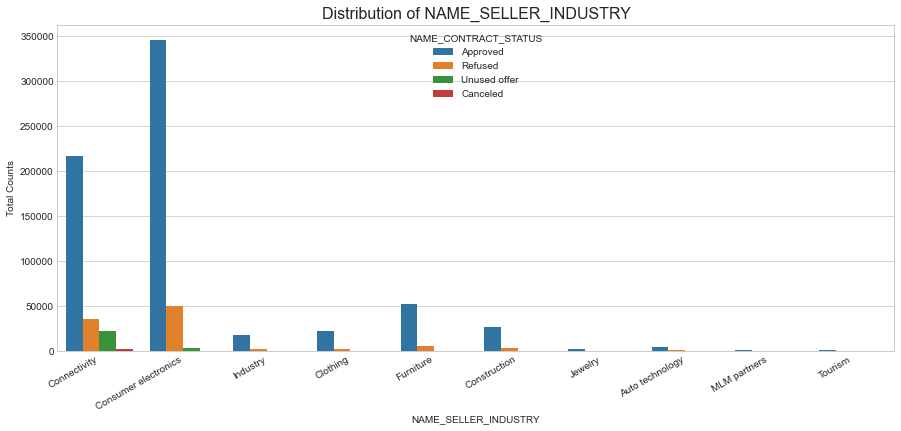

In [78]:
plot_univariant_graph('NAME_SELLER_INDUSTRY')

<i>we can see that loans are most taken by Consumer electronics and most approved are also the same category</i>

In [79]:
# Checking the correlation in the PreviousApplication dataset

cr=p1.corr()
c_df = cr.where(np.triu(np.ones(cr.shape),k=1).astype(np.bool)).unstack().reset_index()
c_df.columns=['Column1','Column2','Correlation']
c_df.dropna(subset=['Correlation'],inplace=True)
c_df['Abs_Correlation']=c_df['Correlation'].abs()
c_df = c_df.sort_values(by=['Abs_Correlation'], ascending=False)
c_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
53,AMT_GOODS_PRICE,AMT_APPLICATION,0.999995,0.999995
54,AMT_GOODS_PRICE,AMT_CREDIT,0.982207,0.982207
43,AMT_CREDIT,AMT_APPLICATION,0.960518,0.960518
52,AMT_GOODS_PRICE,AMT_ANNUITY,0.760791,0.760791
32,AMT_APPLICATION,AMT_ANNUITY,0.757061,0.757061
42,AMT_CREDIT,AMT_ANNUITY,0.753068,0.753068
82,DAYS_DECISION,AMT_ANNUITY,0.194869,0.194869
83,DAYS_DECISION,AMT_APPLICATION,0.185651,0.185651
84,DAYS_DECISION,AMT_CREDIT,0.185053,0.185053
85,DAYS_DECISION,AMT_GOODS_PRICE,0.174441,0.174441


### 2.3)Multivariate Analysis

<Figure size 1440x576 with 0 Axes>

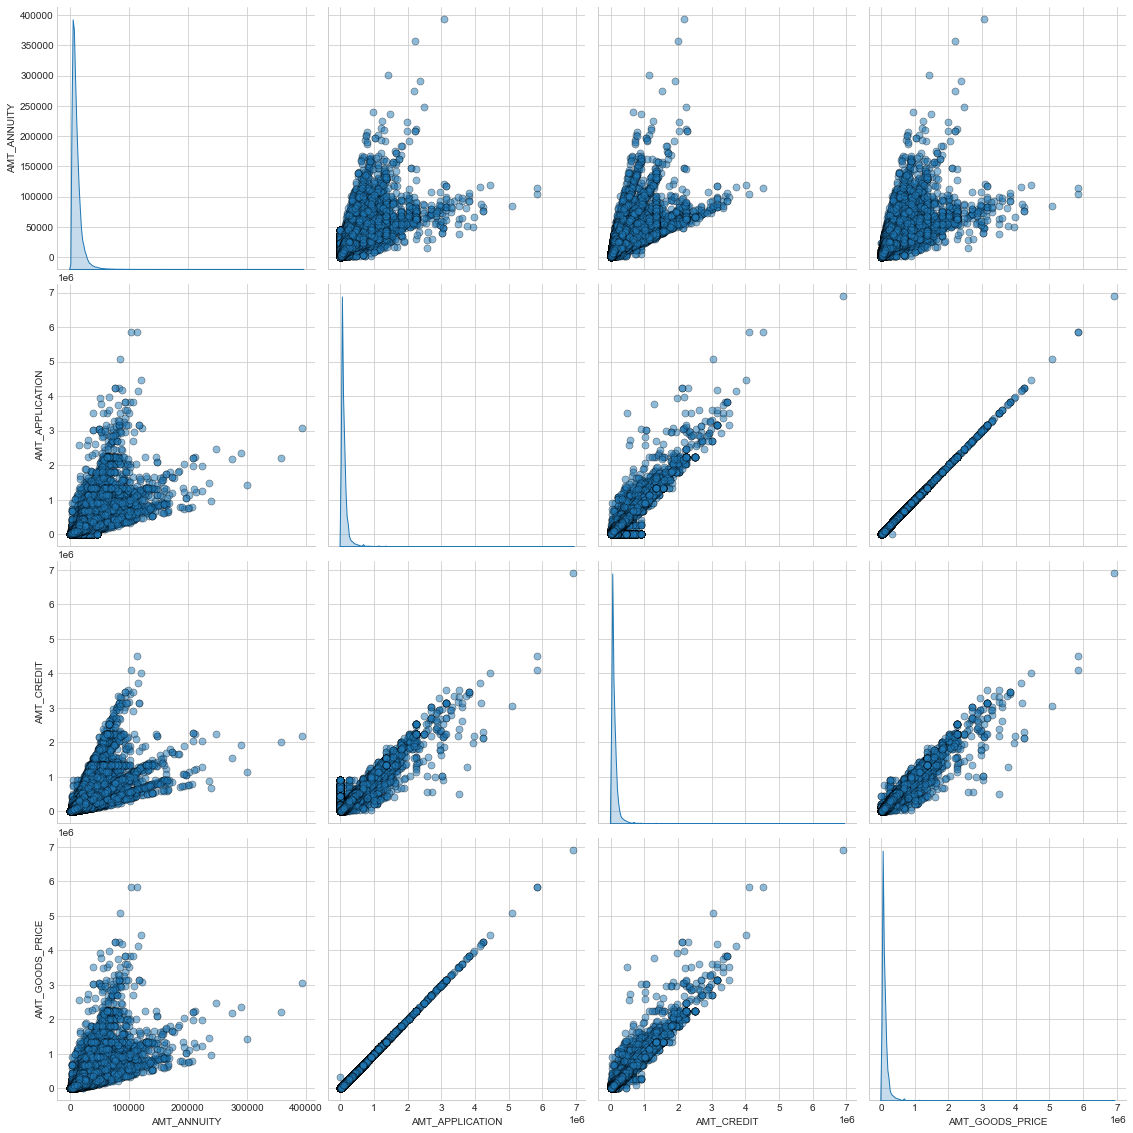

In [80]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(p1[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.5, 's': 50, 'edgecolor': 'k'},
             size = 4)
plt.show()

<i>- Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors) -How much credit did client asked on the previous application 

    -Final credit amount on the previous application that was approved by the bank -Goods price of good that client asked for on the previous application.

    -For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application

    -Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application. 

### 2.4)Bivariate analysis categorical vs numerical columns

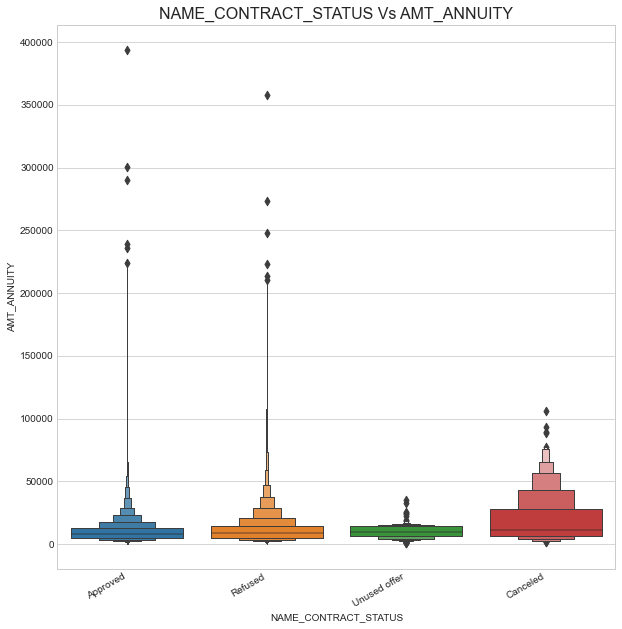

In [81]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
    
sns.boxenplot(x= 'NAME_CONTRACT_STATUS',y = 'AMT_ANNUITY', data=p1)
ax.set_ylabel('AMT_ANNUITY')
ax.set_xlabel('NAME_CONTRACT_STATUS')

ax.set_title('NAME_CONTRACT_STATUS Vs AMT_ANNUITY',fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")    
    

plt.show()

<i>we can see that loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time. We also see that applications with too high AMT ANNUITY also got refused more often than others.</i>

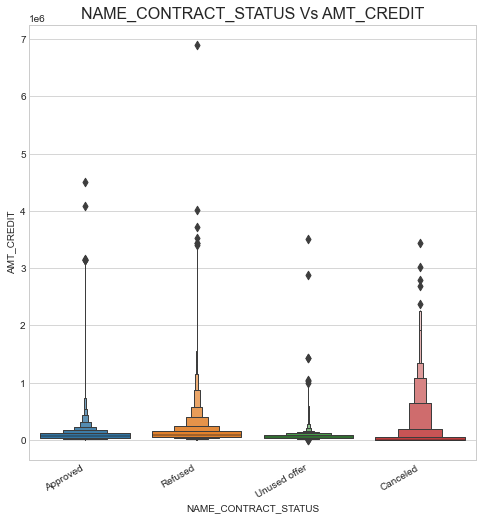

In [82]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
    
sns.boxenplot(x= 'NAME_CONTRACT_STATUS', y = 'AMT_CREDIT', data=p1)
ax.set_ylabel('AMT_CREDIT')
ax.set_xlabel('NAME_CONTRACT_STATUS')

ax.set_title('NAME_CONTRACT_STATUS Vs AMT_CREDIT',fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")    
    
    
plt.show()

<i>We can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.</i>

## 3)MERGING APPLICATION DATA & PREVIOUS APPLICATION DATA

In [83]:
combo_df=pd.merge(app_data,previous,how="left",on=["SK_ID_CURR"])
## Merging the two files to do some analysis

In [84]:
combo_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,26,"(25.0, 30.0]",1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,46,"(45.0, 50.0]",1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,46,"(45.0, 50.0]",2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,

In [85]:
combo_df.shape

(1430100, 112)

In [86]:
combo_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 112 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT_x                  float64 
 9   AMT_ANNUITY_x                 float64 
 10  AMT_GOODS_PRICE_x             float64 
 11  NAME_TYPE_SUITE_x             object  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int64   
 18  D

In [87]:
def mergeplot(Varx,Vary):
    
    plt.style.use('seaborn-whitegrid')
    sns.despine
    NewDat = combo_df.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(12,9))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

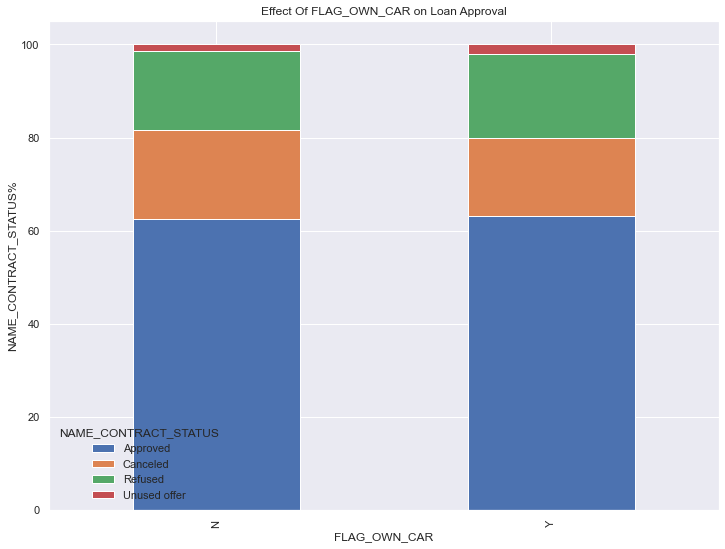

In [88]:
mergeplot('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

<i>From the above graph,we see that car ownership doesn't have any effect on application approval or rejection.</i>

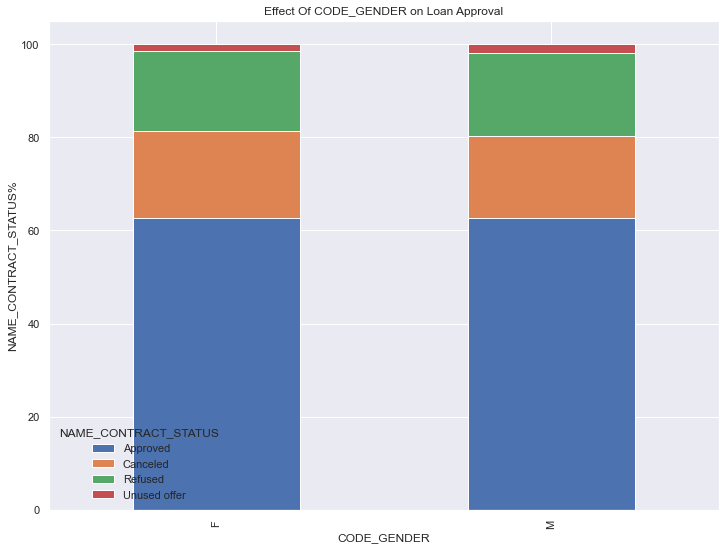

In [89]:
mergeplot('CODE_GENDER','NAME_CONTRACT_STATUS')

<i> From the above graph,we can observe that gender of a person has no effect on the loan approval.</i>

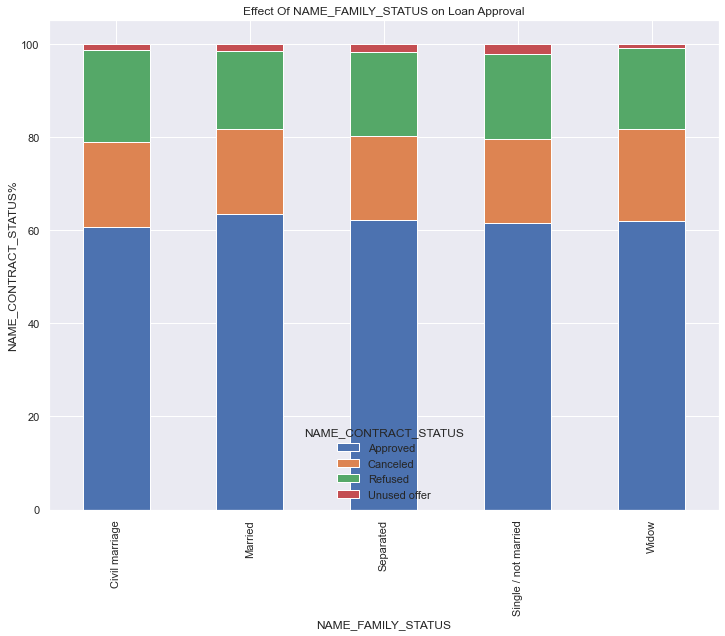

In [90]:
mergeplot("NAME_FAMILY_STATUS","NAME_CONTRACT_STATUS")

<i>Here,although the approval rate is slightly higher , not much diiference can be seen between family status and approval rate.</i>

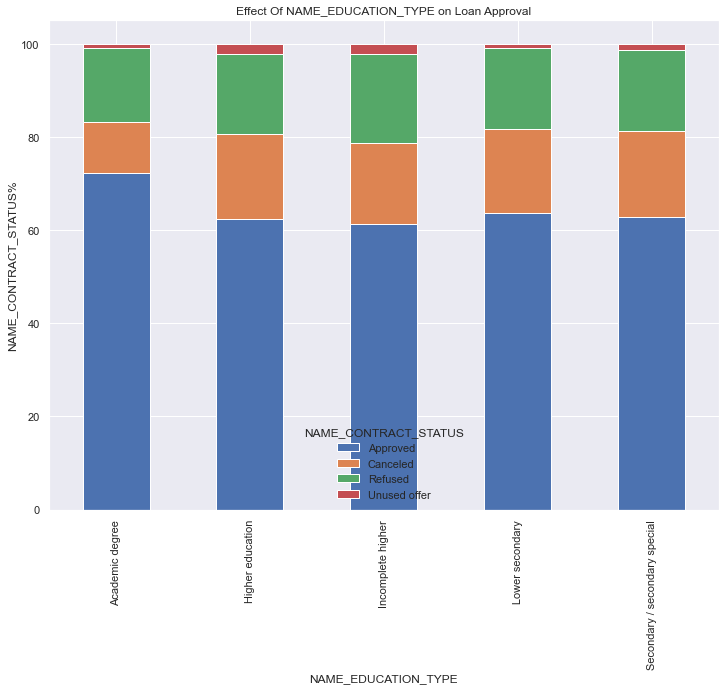

In [91]:
mergeplot("NAME_EDUCATION_TYPE","NAME_CONTRACT_STATUS")

<i>Here,we can see that the approval rate is higher for the people with an academic degree.</i>

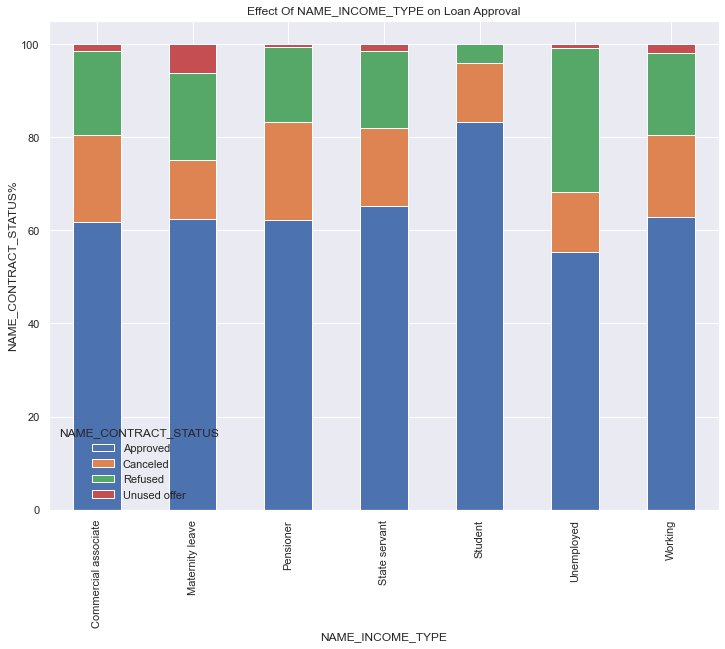

In [92]:
mergeplot("NAME_INCOME_TYPE","NAME_CONTRACT_STATUS")

<i>Here,we see that approval rate is higher for the students.This might be because  company assume that students will pay the loan once they graduate and start earning.We can also observe the refusal rate is higher for the unemployed.This is due to fact that  company is less likely to give a chance to people who aren't employed.</i> 

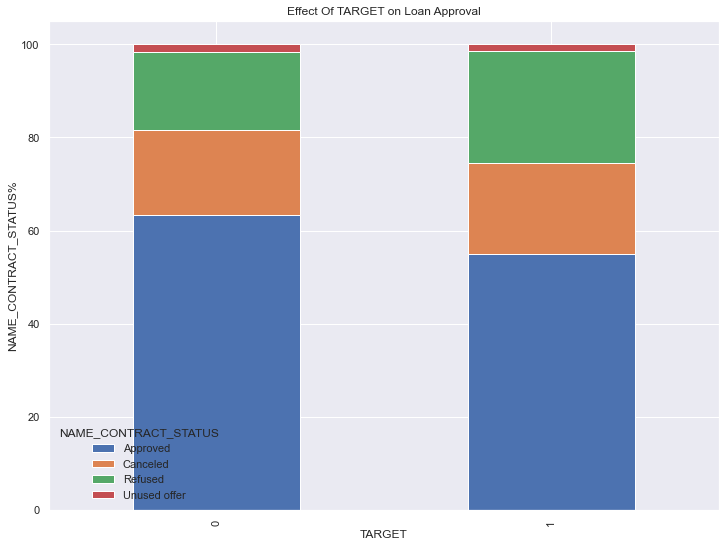

In [93]:
mergeplot('TARGET','NAME_CONTRACT_STATUS')

<i>We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting.</i>